<center><h1>#2 Group Project Report</h1></center>

<h3><center><strong>Task 1</strong></center></h3>

##### Method 1 Intensity Heatmaps

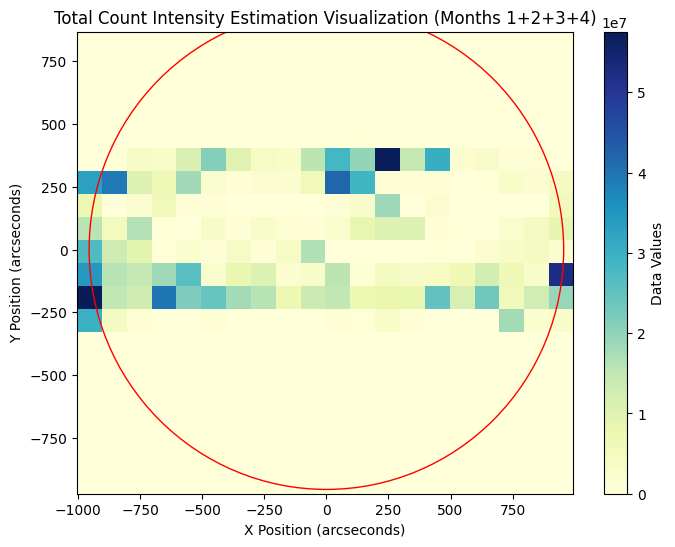

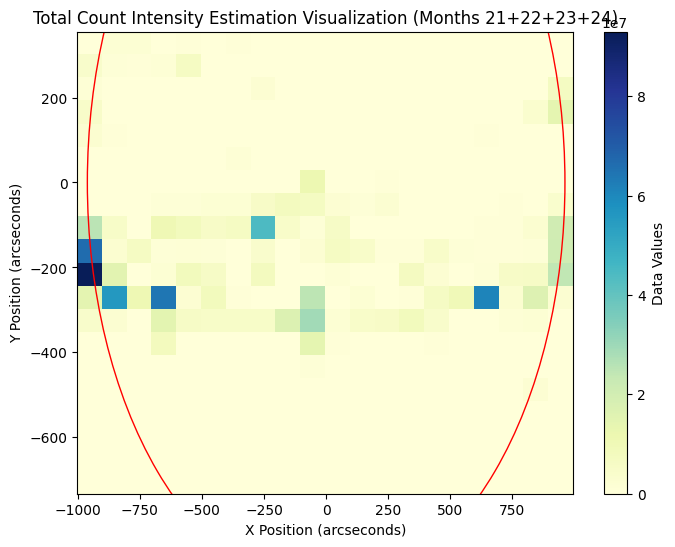

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

set1 = pd.read_csv("Solar_flare_RHESSI_2004_05.csv")
set2 = pd.read_csv("Solar_flare_RHESSI_2004_05.csv")
method1Data = set1['total.counts']

# Filter data for months 1+2+3+4
cond01 = ((set1['year'] == 2004) & (set1['month'].between(1, 4)))
batch01 = set1[cond01]
batch01x = batch01['x.pos.asec'].values
batch01y = batch01['y.pos.asec'].values
batch01TotalCount = batch01['total.counts'].values

# Calculate the radius for the circle based on the data in batch01
r_1to4 = np.sqrt(batch01x ** 2 + batch01y ** 2)
t = 80  # percent
r0_1to4 = np.percentile(r_1to4, t)

# Filter data for months 21+22+23+24
cond02 = ((set2['year'] == 2005) & (set2['month'].between(9, 12)))
batch02 = set2[cond02]
batch02x = batch02['x.pos.asec'].values
batch02y = batch02['y.pos.asec'].values
batch02TotalCount = batch02['total.counts'].values

# Calculate the radius for the circle based on the data in batch02
r_21to24 = np.sqrt(batch02x ** 2 + batch02y ** 2)
t = 80  # percent
r0_21to24 = np.percentile(r_21to24, t)

xBins = 20
yBins = 20

batch01HeatMap, batch01XEdges, batch01YEdges = np.histogram2d(batch01x, batch01y, bins=(xBins, yBins), weights=batch01TotalCount)

# Create extent for the heatmap
extent = [batch01XEdges[0], batch01XEdges[-1], batch01YEdges[0], batch01YEdges[-1]]

# Plot the heatmap for batch01
plt.figure(figsize=(8, 6))
plt.imshow(batch01HeatMap.T, extent=extent, origin='lower', aspect='auto', cmap='YlGnBu')
plt.colorbar(label='Data Values')  # Add a colorbar for reference
circle1 = plt.Circle((0, 0), r0_1to4, color='r', fill=False)
plt.gca().add_artist(circle1)
plt.xlabel('X Position (arcseconds)')
plt.ylabel('Y Position (arcseconds)')
plt.title('Total Count Intensity Estimation Visualization (Months 1+2+3+4)')
plt.show()

batch02HeatMap, batch02XEdges, batch02YEdges = np.histogram2d(batch02x, batch02y, bins=(xBins, yBins), weights=batch02TotalCount)

# Create extent for the heatmap
extent = [batch02XEdges[0], batch02XEdges[-1], batch02YEdges[0], batch02YEdges[-1]]

# Plot the heatmap for batch02
plt.figure(figsize=(8, 6))
plt.imshow(batch02HeatMap.T, extent=extent, origin='lower', aspect='auto', cmap='YlGnBu')
plt.colorbar(label='Data Values')  # Add a colorbar for reference
circle2 = plt.Circle((0, 0), r0_21to24, color='r', fill=False)
plt.gca().add_artist(circle2)
plt.xlabel('X Position (arcseconds)')
plt.ylabel('Y Position (arcseconds)')
plt.title('Total Count Intensity Estimation Visualization (Months 21+22+23+24)')
plt.show()


##### Method 2

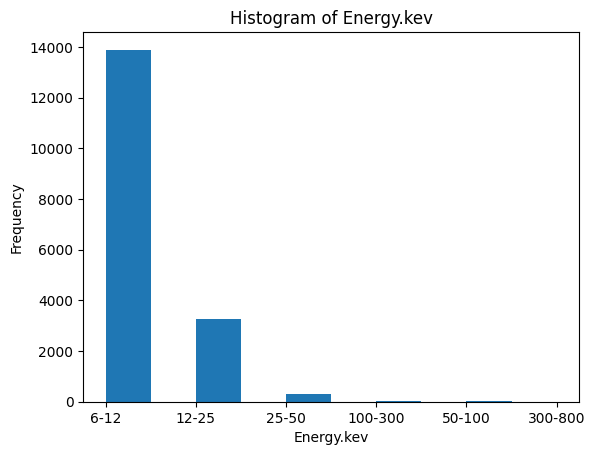

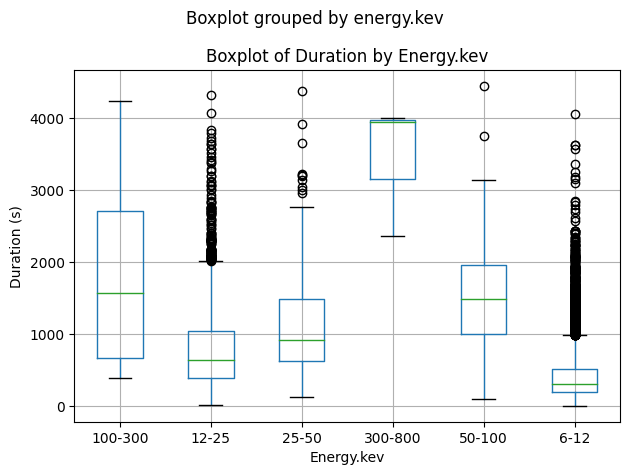

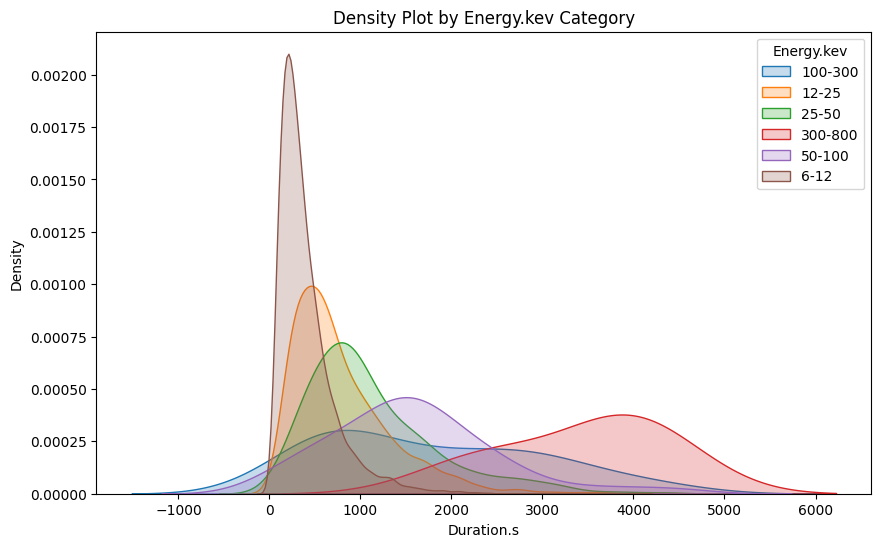

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#Reading csv file
solar = pd.read_csv("Solar_flare_RHESSI_2004_05.csv")

#Converting energy to a categorical variable
solar['energy.kev'] = solar['energy.kev'].astype('category')

#Create histogram for energy
plt.hist(solar['energy.kev'])
plt.xlabel('Energy.kev')
plt.ylabel('Frequency')
plt.title('Histogram of Energy.kev')


# Create a boxplot
solar.boxplot(column='duration.s', by='energy.kev', vert=True)
plt.xlabel('Energy.kev')
plt.ylabel('Duration (s)')
plt.title('Boxplot of Duration by Energy.kev')
plt.tight_layout()



# Density Plot - Kernel Density Estimation
# Set up the plot
plt.figure(figsize=(10, 6))

# Iterate through each 'energy.kev' category and plot the KDE
for category in solar['energy.kev'].cat.categories:
    subset = solar[solar['energy.kev'] == category]
    sns.kdeplot(subset['duration.s'], label=category, fill=True)

plt.legend(title='Energy.kev')
plt.xlabel('Duration.s')
plt.title('Density Plot by Energy.kev Category')
  
plt.show() 

##### Method 2 Intensity Heatmaps

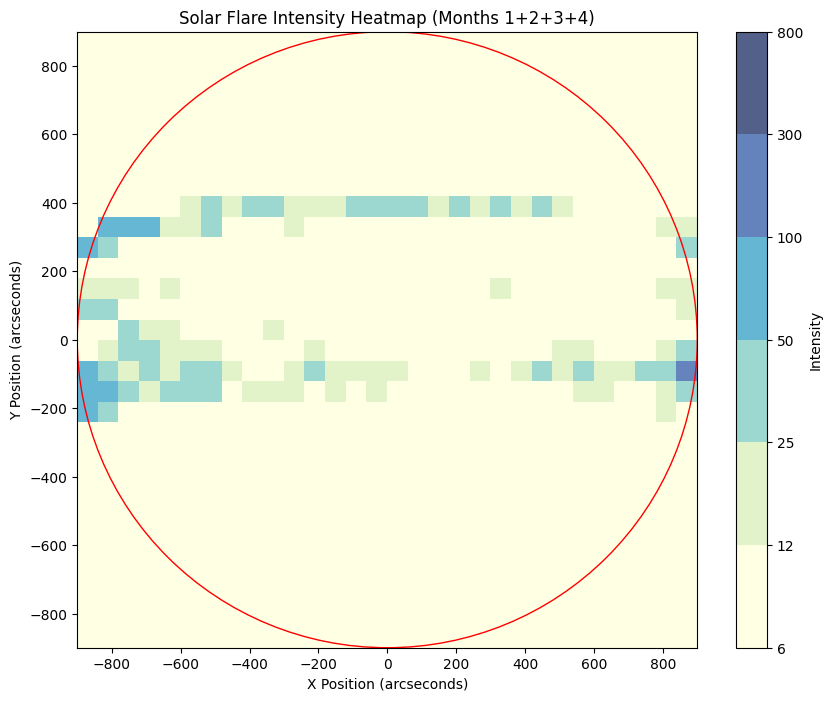

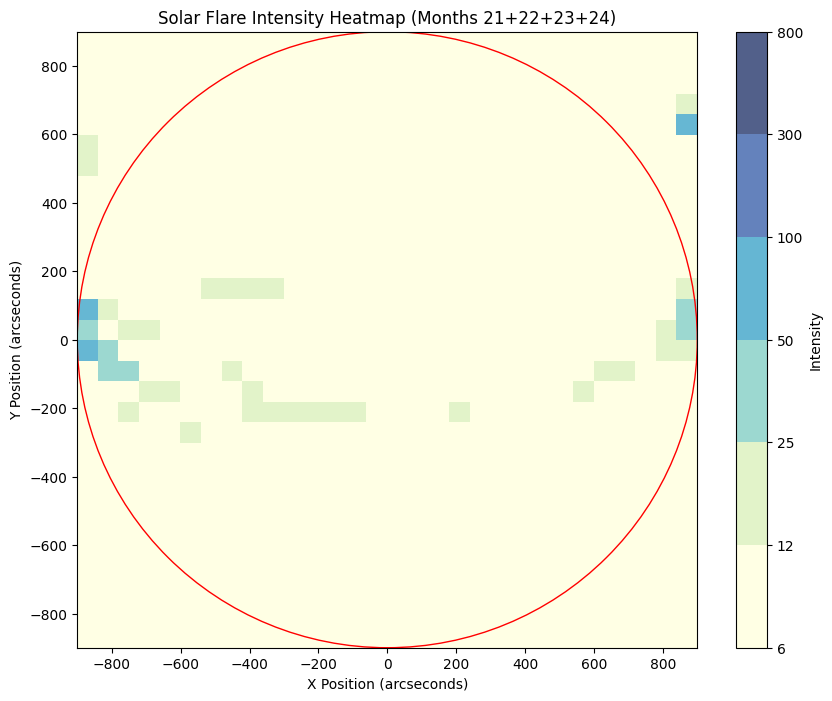

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import BoundaryNorm, ListedColormap

# Load dataset
df = pd.read_csv('Solar_flare_RHESSI_2004_05.csv')

# Filter data for months 1+2+3+4
m_1to4 = ((df['year'] == 2004) & (df['month'].between(1, 4)))
df_1to4 = df[m_1to4]

# Filter data for months 21+22+23+24
m_21to24 = ((df['year'] == 2005) & (df['month'].between(9, 12)))
df_21to24 = df[m_21to24]

# Define the energy ranges based on energy.kev values
energy_kev_ranges = [(6, 12), (12, 25), (25, 50), (50, 100), (100, 300), (300, 800)]

# Create colormap and norm
cmap = plt.get_cmap('YlGnBu', len(energy_kev_ranges))
boundaries = [range[0] for range in energy_kev_ranges] + [energy_kev_ranges[-1][1]]
norm = BoundaryNorm(boundaries, cmap.N, clip=True)

# Set the circle radius
circle_radius = 900

# Create a heatmap for months 1+2+3+4
heatmap1, xedges1, yedges1 = np.histogram2d(df_1to4['x.pos.asec'], df_1to4['y.pos.asec'], bins=30)
extent1 = [-circle_radius, circle_radius, -circle_radius, circle_radius]
fig1, ax1 = plt.subplots(figsize=(10, 8))
sc1 = ax1.imshow(heatmap1.T, extent=extent1, origin='lower', aspect='auto', cmap=cmap, alpha=0.7, norm=norm)
colorbar_ticks1 = [range[0] for range in energy_kev_ranges] + [800]
ax1.set_title('Solar Flare Intensity Heatmap (Months 1+2+3+4)')
ax1.set_xlabel('X Position (arcseconds)')
ax1.set_ylabel('Y Position (arcseconds)')
circle1 = plt.Circle((0, 0), circle_radius, color='r', fill=False)
ax1.add_artist(circle1)
cbar1 = fig1.colorbar(sc1, ax=ax1, label='Intensity', boundaries=boundaries, ticks=colorbar_ticks1)

# Create a heatmap for months 21+22+23+24
heatmap2, xedges2, yedges2 = np.histogram2d(df_21to24['x.pos.asec'], df_21to24['y.pos.asec'], bins=30)
extent2 = [-circle_radius, circle_radius, -circle_radius, circle_radius]
fig2, ax2 = plt.subplots(figsize=(10, 8))
sc2 = ax2.imshow(heatmap2.T, extent=extent2, origin='lower', aspect='auto', cmap=cmap, alpha=0.7, norm=norm)
colorbar_ticks2 = [range[0] for range in energy_kev_ranges] + [800]
ax2.set_title('Solar Flare Intensity Heatmap (Months 21+22+23+24)')
ax2.set_xlabel('X Position (arcseconds)')
ax2.set_ylabel('Y Position (arcseconds)')
circle2 = plt.Circle((0, 0), circle_radius, color='r', fill=False)
ax2.add_artist(circle2)
cbar2 = fig2.colorbar(sc2, ax=ax2, label='Intensity', boundaries=boundaries, ticks=colorbar_ticks2)
plt.show()
